# Data Preprocessing

In [76]:
pip install -U imbalanced-learn

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.impute import SimpleImputer
from scipy import stats

In [78]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [79]:
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
621,50622,0,14.0,Computer,1,13.0,Debit Card,Female,2.0,5,Others,3,Married,2,0,NaN,1.0,5.0,10.0,299.73
995,50996,0,11.0,Phone,3,22.0,Debit Card,Female,2.0,3,Laptop & Accessory,4,Single,3,0,12.0,0.0,1.0,2.0,141.98
2361,52362,1,NaN,Mobile Phone,1,14.0,Debit Card,Female,2.0,4,Mobile Phone,4,Single,2,0,12.0,0.0,1.0,0.0,112.61
1575,51576,0,25.0,Phone,1,8.0,Debit Card,Female,2.0,4,Mobile,1,Single,8,0,15.0,2.0,2.0,2.0,132.12
3860,53861,0,1.0,Computer,1,9.0,Credit Card,Male,3.0,4,Mobile Phone,1,Single,4,0,14.0,1.0,2.0,3.0,150.80
3224,53225,0,27.0,Mobile Phone,1,14.0,Debit Card,Male,3.0,3,Grocery,3,Divorced,5,0,20.0,NaN,2.0,4.0,273.14
2077,52078,1,0.0,Computer,1,NaN,CC,Female,2.0,3,Mobile,4,Single,1,0,17.0,0.0,1.0,2.0,124.22
84,50085,0,19.0,Mobile Phone,1,6.0,Credit Card,Male,3.0,3,Fashion,5,Married,8,0,16.0,0.0,1.0,3.0,193.96
5134,55135,0,1.0,Computer,3,9.0,Debit Card,Male,3.0,6,Laptop & Accessory,1,Single,5,0,21.0,1.0,2.0,1.0,175.71
1346,51347,0,22.0,Computer,1,14.0,Debit Card,Male,3.0,4,Laptop & Accessory,4,Married,2,0,23.0,0.0,1.0,7.0,151.30


### Menghapus column Customer ID

In [80]:
df1 = df.copy()
df1.drop('CustomerID', axis = 1, inplace = True)

In [81]:
#pengelompokan
cats = ['Churn','CityTier','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']
nums = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress'
            ,'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### Merge Value Ganda

In [88]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df1[col].value_counts())
    print()

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


In [89]:
df2 = df1.copy()
df2.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df2.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df2.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
df2.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [90]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print()

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

Value count kolom Complain:
0    4026
1    1604
Name: Complain, dtype: int64



## A. Handling Missing Value

In [91]:
df2.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [92]:
sum_missing = df2.isna().sum()
percent_missing = round(df2.isnull().sum() * 100 / len(df2),2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,sum_missing,percent_missing
0,Churn,0,0.00
1,Tenure,264,4.69
2,PreferredLoginDevice,0,0.00
3,CityTier,0,0.00
4,WarehouseToHome,251,4.46
5,PreferredPaymentMode,0,0.00
6,Gender,0,0.00
7,HourSpendOnApp,255,4.53
8,NumberOfDeviceRegistered,0,0.00
9,PreferedOrderCat,0,0.00


In [98]:
print(f'The number of missing values: {df2.isnull().sum().sum()}')
print(f'The number of rows with missing values: {df2[df2.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


### Fill Treatment untuk missing Values
Total ada 1.856 missing values, dan juga ada 1.856 rows dengan missing values, artinya setiap missing values berada pada row yang berbeda, dan tidak ada rows yang memiliki lebih dari satu missing values.
<br>
Jadi jika kita drop semua rows dengan missing values, kita akan membuang 1856 rows atau 32,97 persen dari dataset dan akan menyebabkan data loss, sehingga treatment yang paling tepat adalah dengan imputation

In [102]:
df3 = df2.copy()
imputer = SimpleImputer(strategy= 'median')      
imputer.fit(df3[nums])
df3[nums] = imputer.transform(df3[nums])

In [103]:
df3.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## B. Handling Outliers

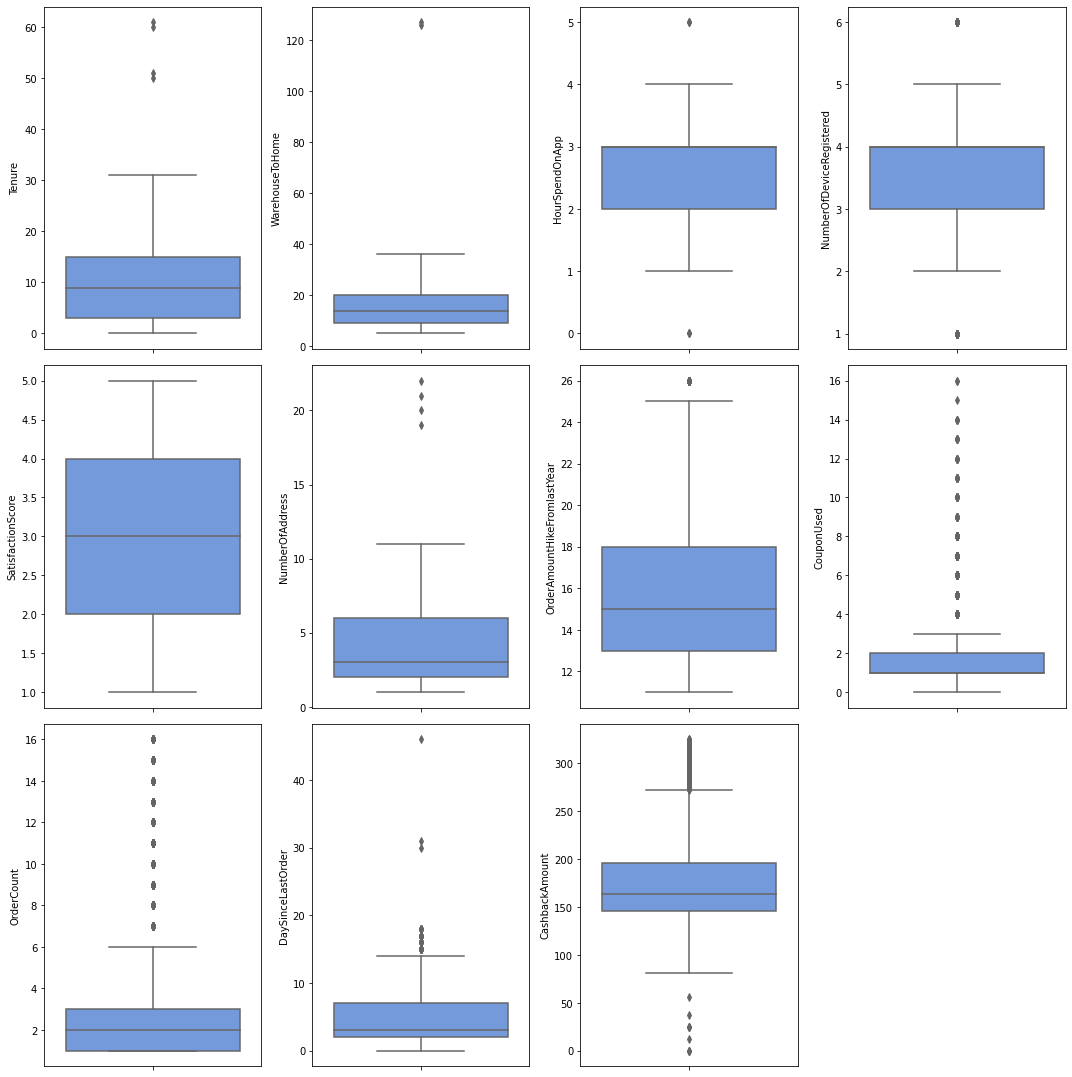

In [104]:
plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df3[nums[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

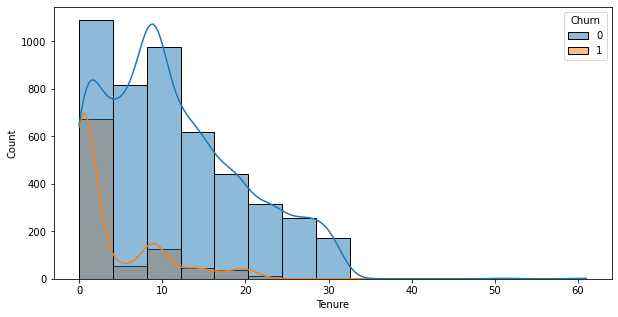

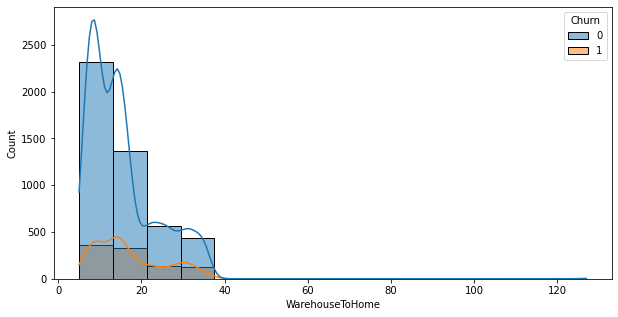

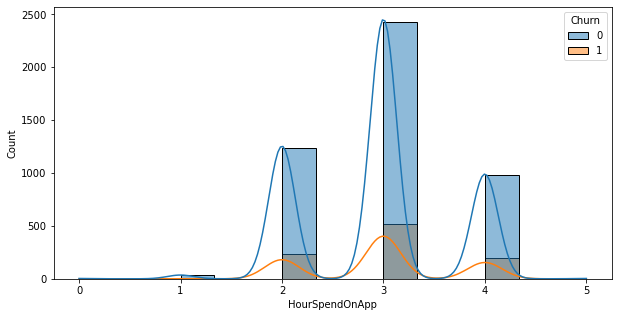

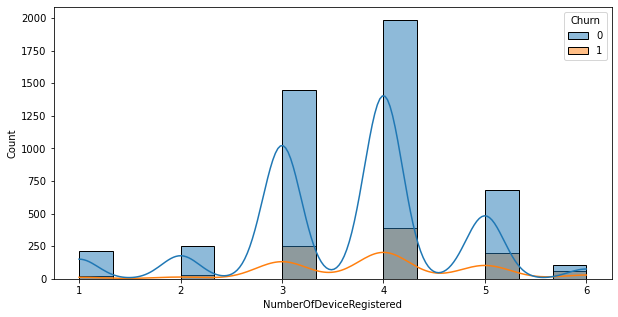

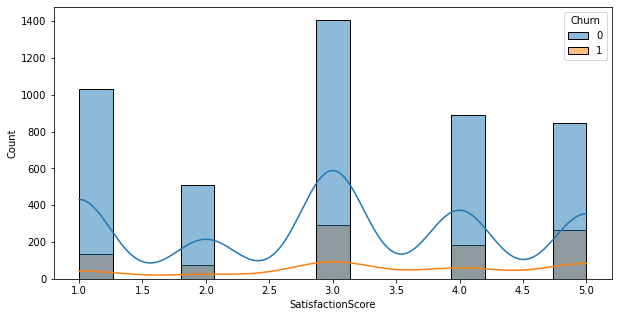

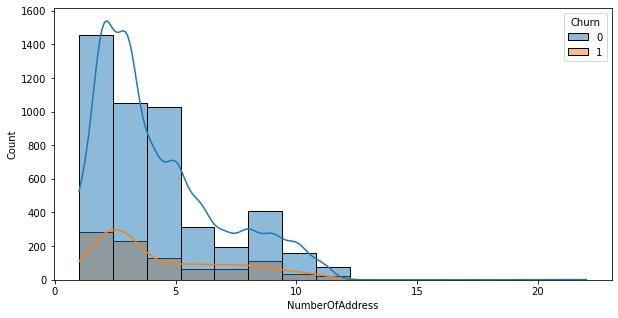

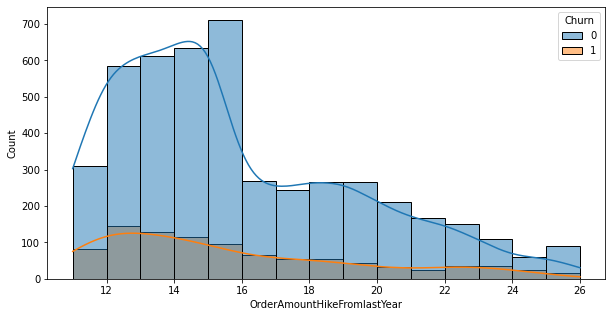

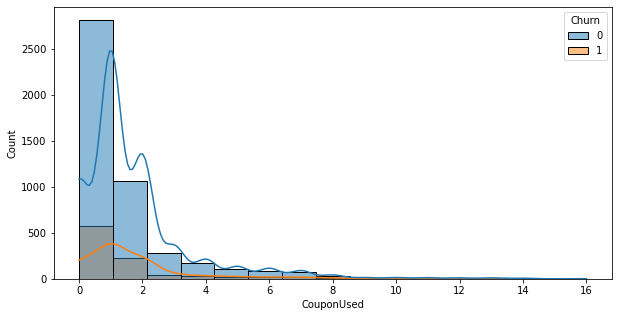

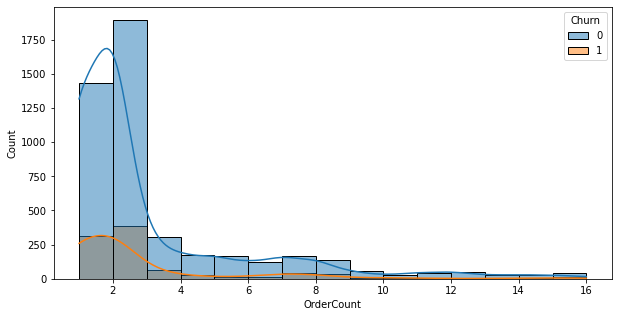

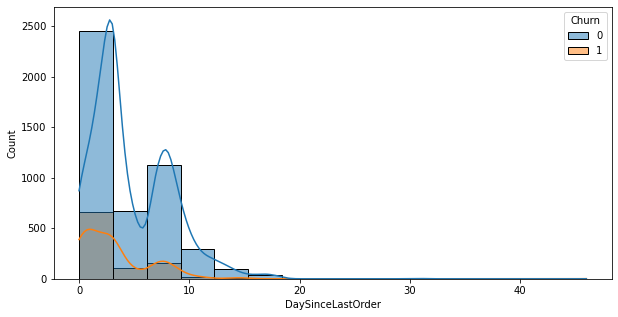

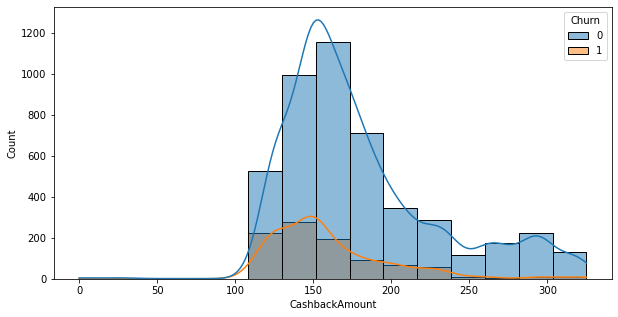

In [105]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df3, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

### Handling Outliers dengan Z-Score

In [111]:
df4_zscore = df3.copy()

In [112]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df4_zscore)}')

filtered_entries = np.array([True] * len(df4_zscore))

for col in nums:
    zscore = abs(stats.zscore(df4_zscore[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df4_zscore = df4_zscore[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df4_zscore)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


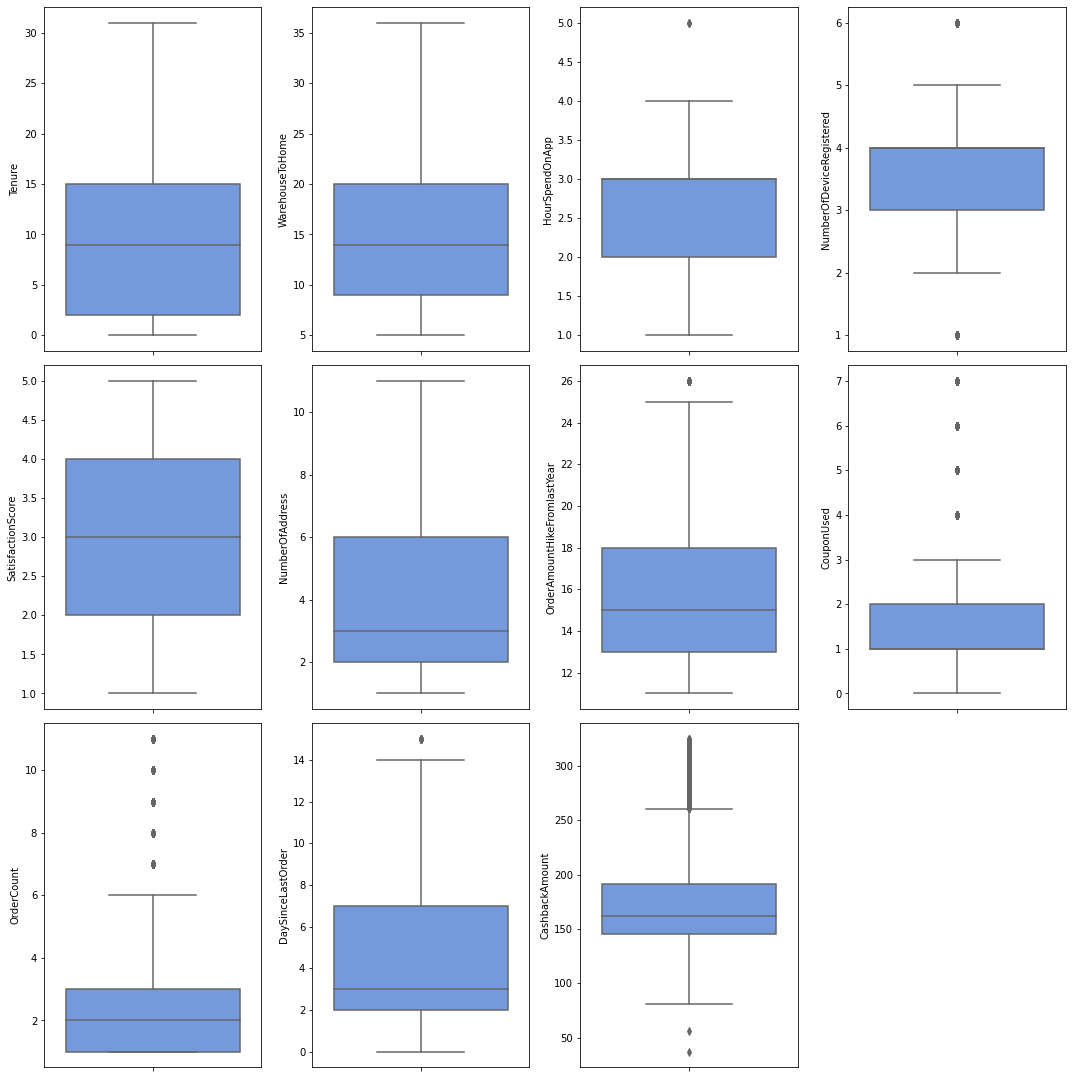

In [113]:
plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df4_zscore[nums[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

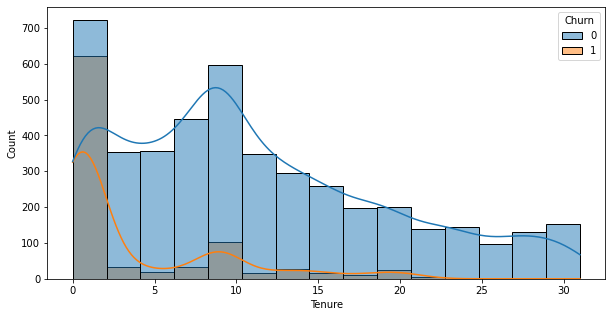

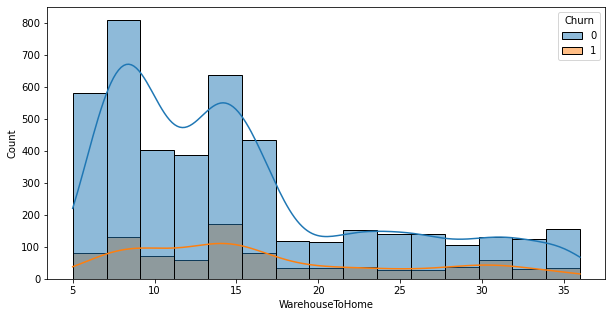

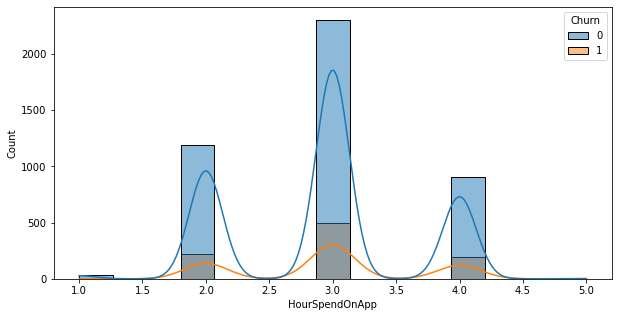

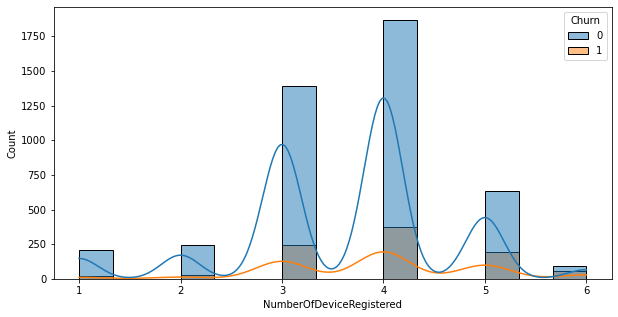

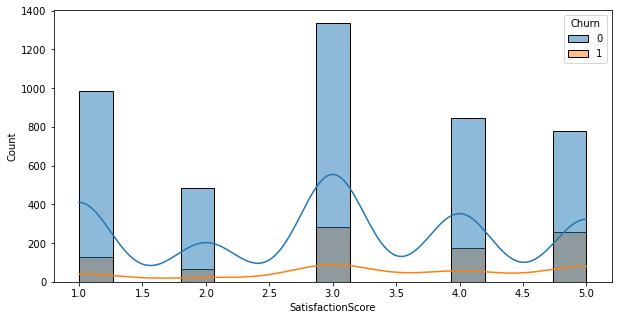

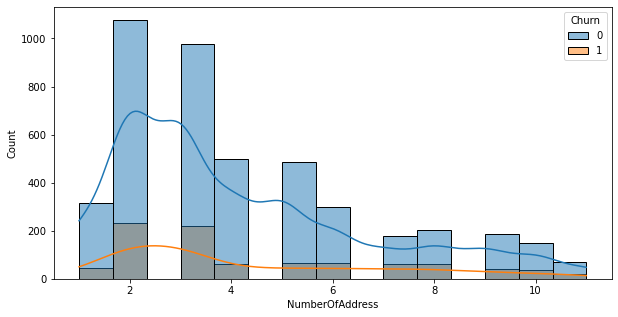

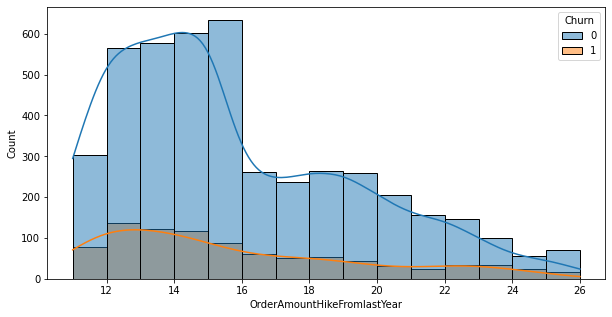

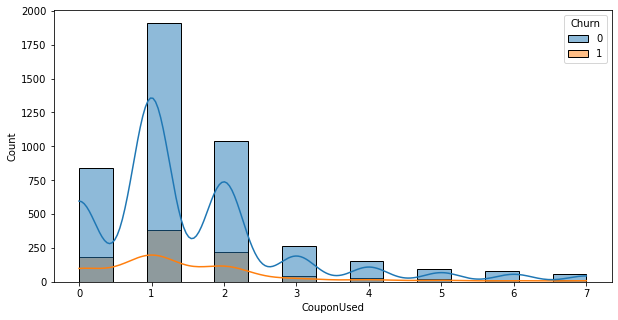

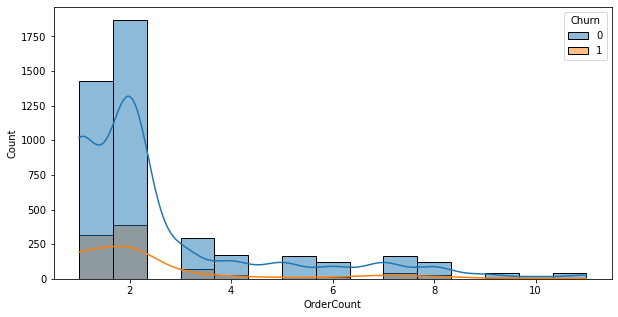

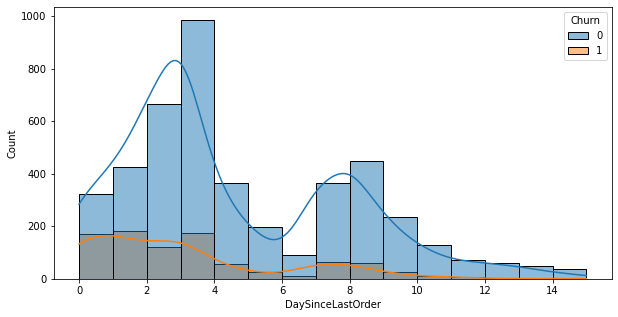

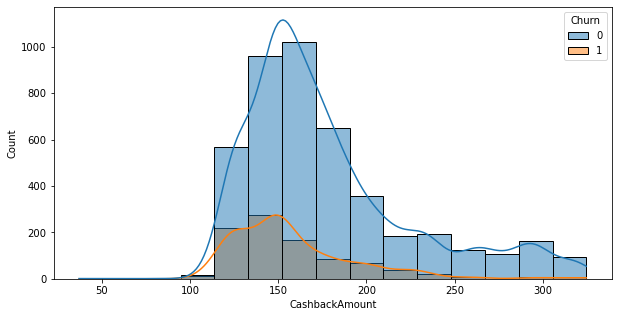

In [114]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df4_zscore, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

### Handling Outliers dengan IQR

In [115]:
df4_IQR = df3.copy()

In [116]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df4_IQR)}')

filtered_entries = np.array([True] * len(df4_IQR))
for col in nums:
    Q1 = df4_IQR[col].quantile(0.25)
    Q3 = df4_IQR[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df4_IQR[col] >= low_limit) & (df4_IQR[col] <= high_limit)) & filtered_entries
    
df4_IQR = df4_IQR[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df4_IQR)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 4048


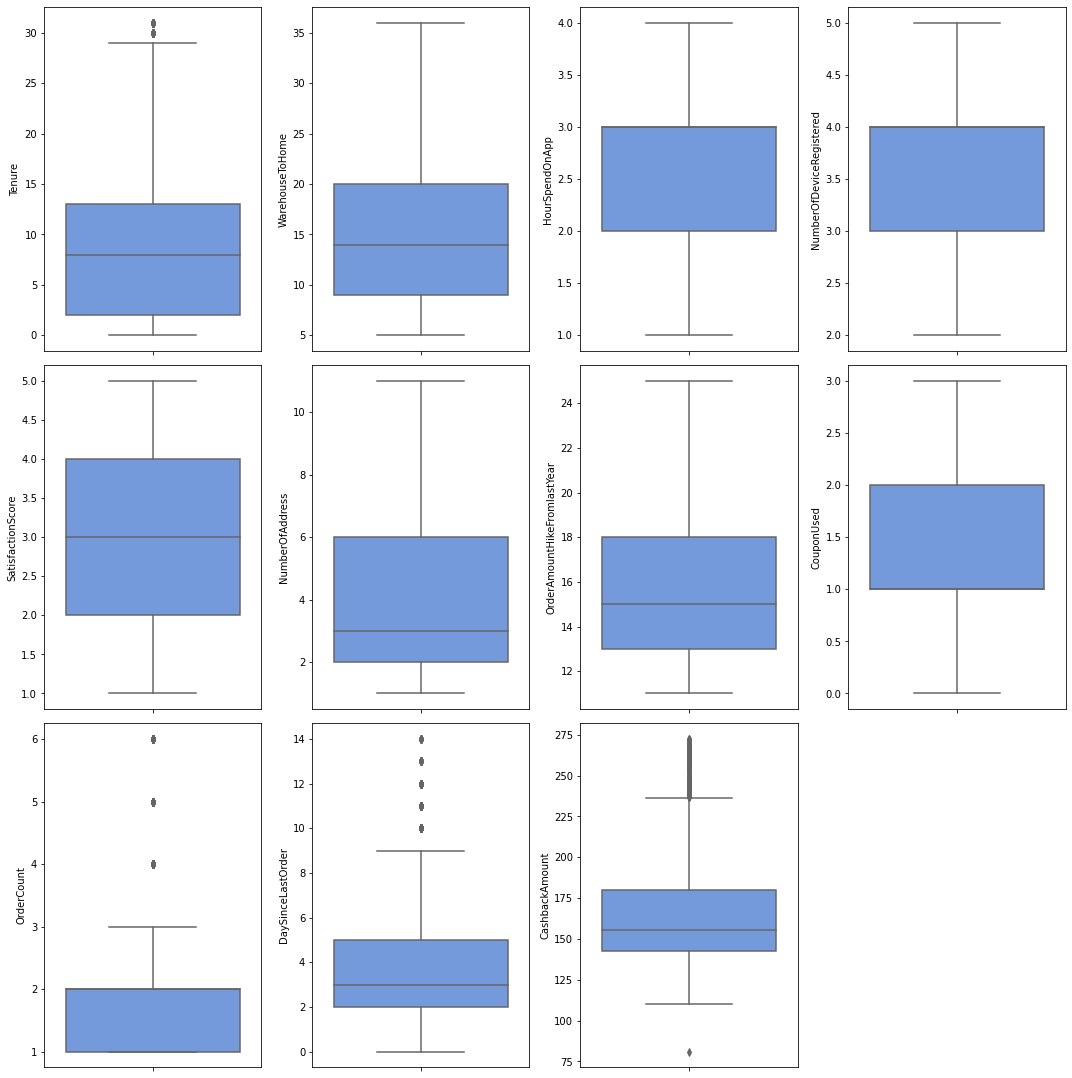

In [117]:
plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df4_IQR[nums[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

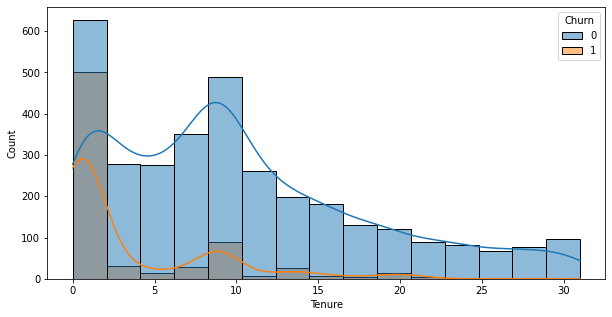

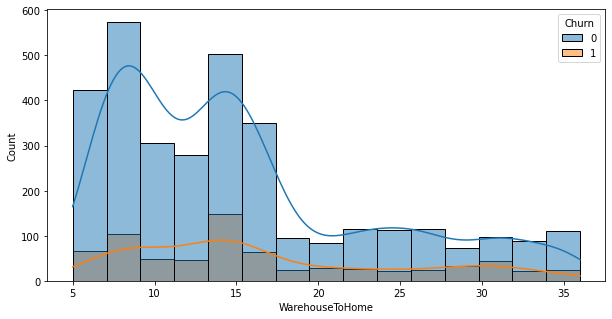

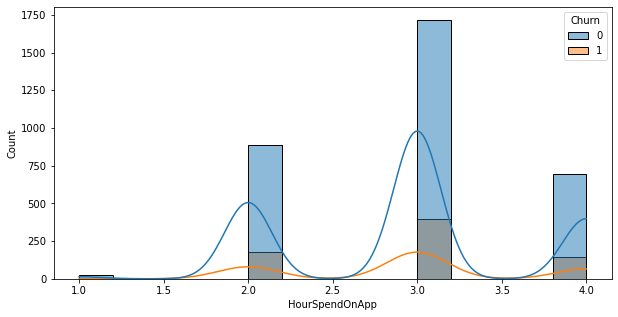

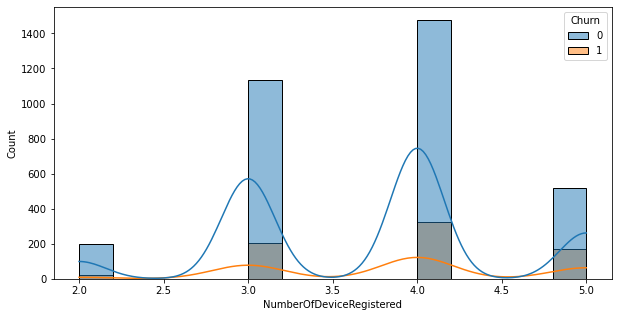

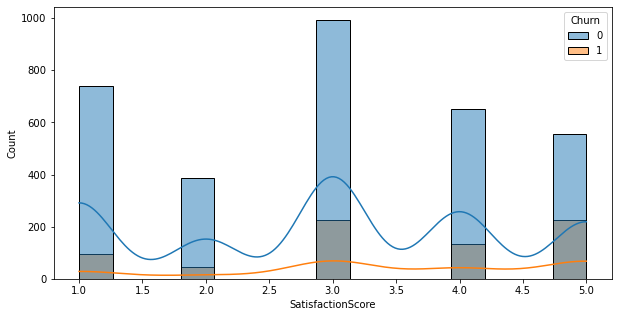

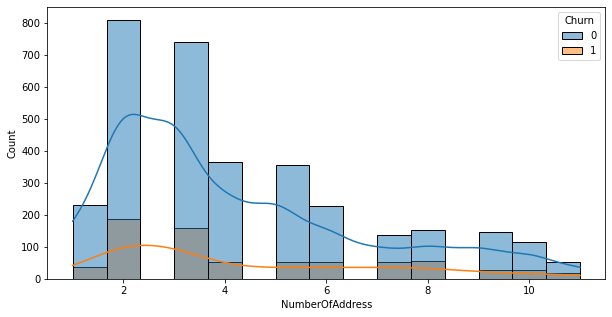

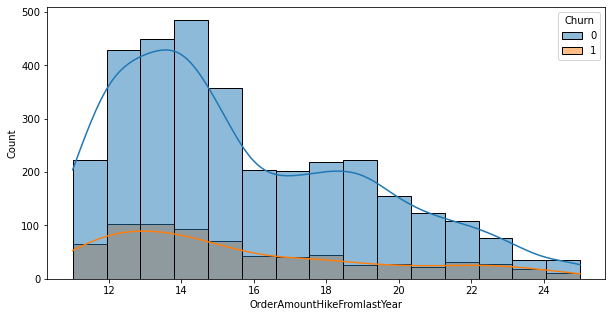

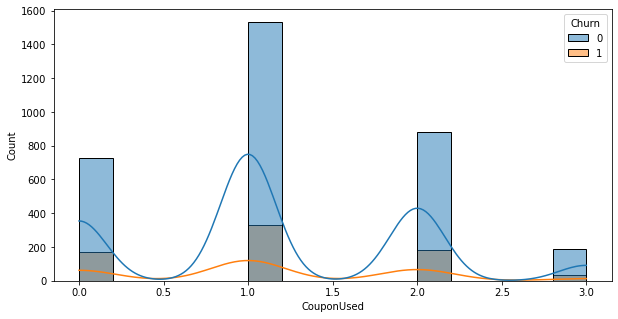

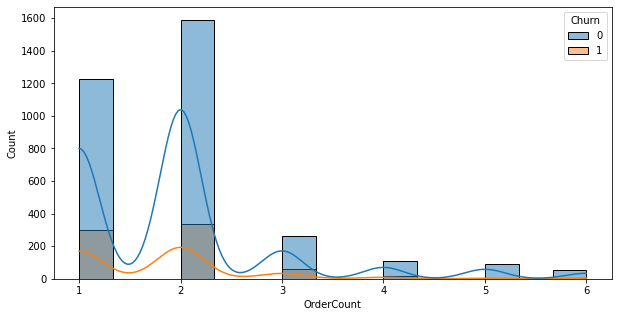

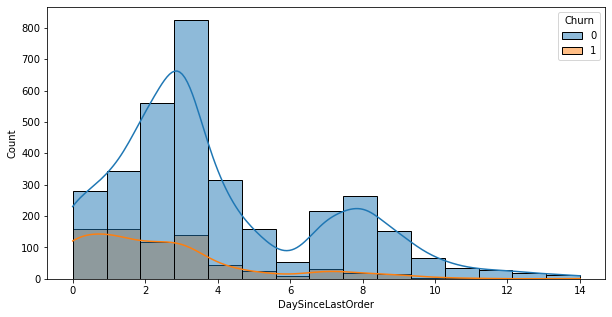

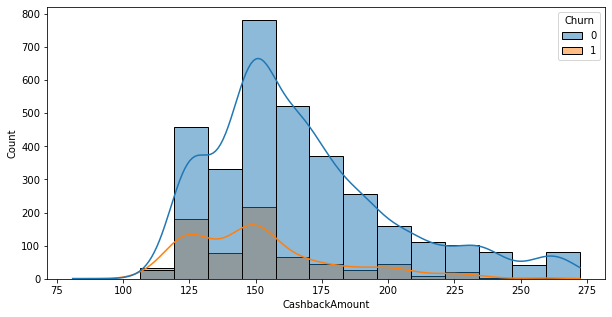

In [119]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df4_IQR, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

## C. Feature Transformation

In [120]:
df4_zscore[nums]

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3.0,2.0,9.0,11.0,1.0,1.0,5.0,159.93
1,9.0,8.0,3.0,4.0,3.0,7.0,15.0,0.0,1.0,0.0,120.90
2,9.0,30.0,2.0,4.0,3.0,6.0,14.0,0.0,1.0,3.0,120.28
3,0.0,15.0,2.0,4.0,5.0,8.0,23.0,0.0,1.0,3.0,134.07
4,0.0,12.0,3.0,3.0,5.0,3.0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2.0,1.0,6.0,18.0,1.0,2.0,4.0,150.71
5626,13.0,13.0,3.0,5.0,5.0,6.0,16.0,1.0,2.0,3.0,224.91
5627,1.0,11.0,3.0,2.0,4.0,3.0,21.0,1.0,2.0,4.0,186.42
5628,23.0,9.0,4.0,5.0,4.0,4.0,15.0,2.0,2.0,9.0,178.90


### Transformasi dengan Metode Normalization

In [134]:
df5_normalized = df4_zscore.copy()

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df5_normalized[nums])
df5_normalized[nums] = scaler.transform(df5_normalized[nums])

In [137]:
df5_normalized.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3091,0,0.967742,Computer,3,0.258065,Debit Card,Female,0.5,0.4,Grocery,1.00,Divorced,1.0,0,0.066667,0.428571,0.1,0.533333,0.765023
3502,0,0.548387,Computer,1,0.935484,Debit Card,Female,0.5,0.6,Fashion,1.00,Divorced,0.9,0,0.066667,0.142857,0.1,0.133333,0.681889
2305,0,0.451613,Computer,3,0.064516,E wallet,Female,0.5,0.4,Laptop & Accessory,1.00,Married,0.0,0,0.400000,0.000000,0.0,0.466667,0.361554
415,1,0.290323,Mobile Phone,1,0.032258,Debit Card,Female,0.5,0.8,Mobile Phone,0.75,Single,0.7,1,0.133333,0.142857,0.2,0.466667,0.295972
3598,0,0.225806,Mobile Phone,3,0.387097,E wallet,Male,0.5,0.2,Fashion,0.50,Married,0.1,1,0.266667,0.285714,0.1,0.600000,0.597088


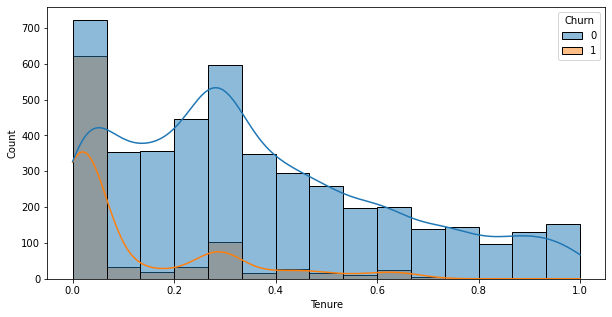

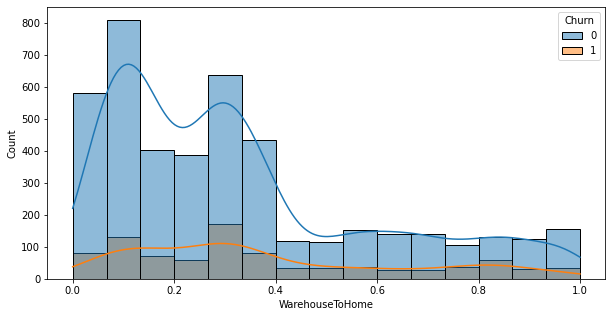

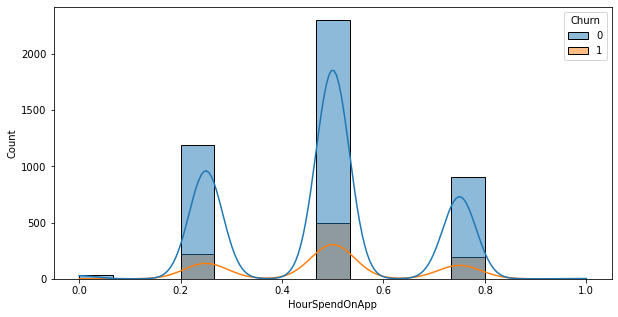

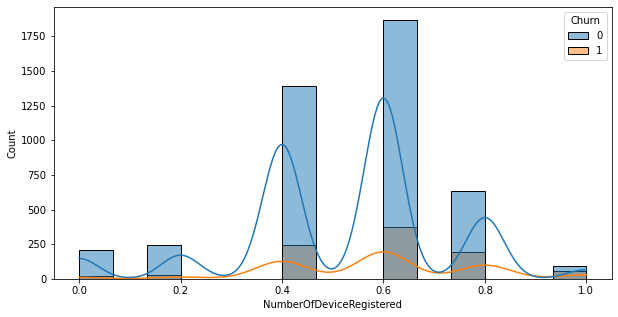

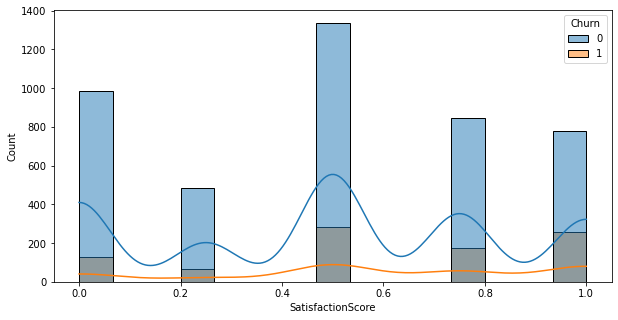

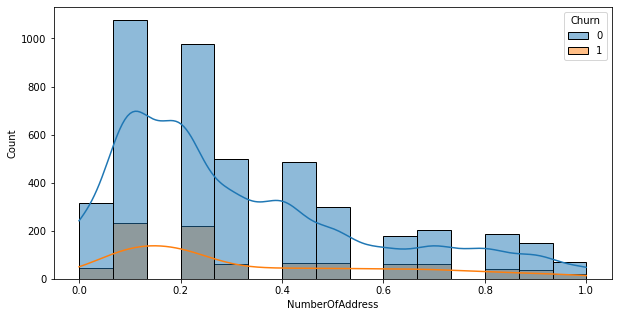

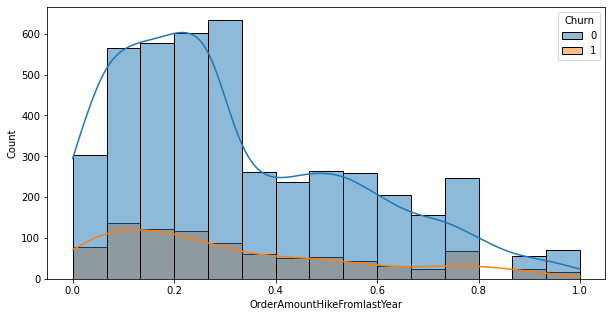

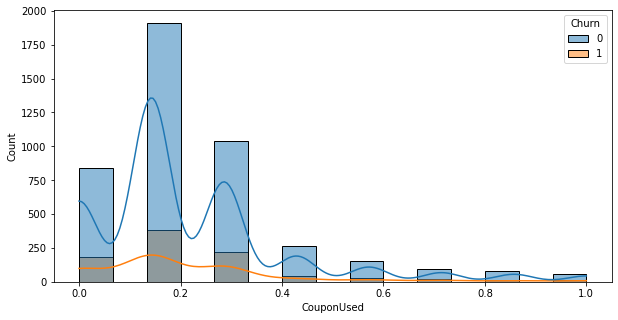

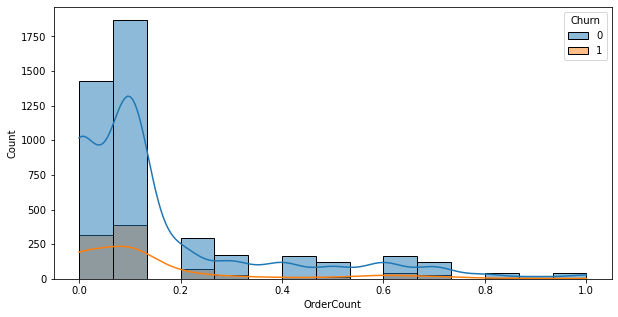

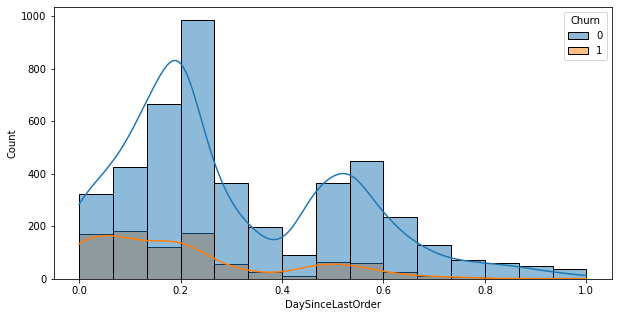

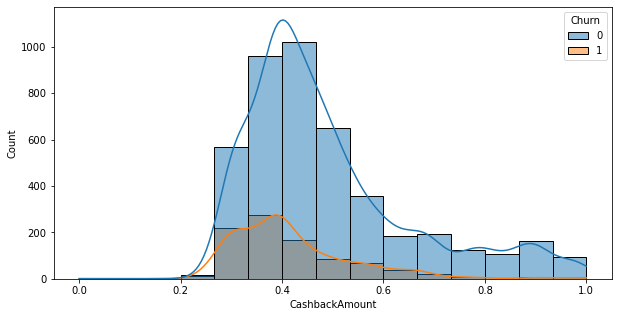

In [138]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df5_normalized, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

### Transformasi dengan Metode Standardization

In [141]:
df5_standardized = df4_zscore.copy()

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df5_standardized[nums])
df5_standardized[nums] = scaler.transform(df5_standardized[nums])

In [143]:
df5_standardized.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2967,0,0.268517,Mobile Phone,3,-0.191105,Credit Card,Female,0.100132,-0.658056,Laptop & Accessory,1.409726,Married,-0.470250,1,2.613040,-0.369994,2.610222,1.152284,0.139066
3934,0,-0.709736,Computer,1,-0.811048,Cash on Delivery,Female,1.524884,1.291335,Mobile Phone,1.409726,Single,-0.863288,0,0.374442,-0.369994,-0.268007,1.152284,0.002153
2959,0,0.023953,Mobile Phone,1,-0.315093,Debit Card,Male,0.100132,0.316639,Mobile Phone,-0.766279,Divorced,-0.863288,0,-1.024681,2.463888,4.049336,2.375503,-0.375702
2478,0,0.757643,Mobile Phone,1,2.164680,Cash on Delivery,Male,-1.324620,-2.607447,Mobile Phone,0.684391,Married,0.708865,0,-1.024681,-0.369994,-0.747712,-0.682545,-0.554958
1763,0,-1.198863,Mobile Phone,1,1.668725,Debit Card,Female,0.100132,-0.658056,Mobile Phone,-1.491615,Married,-0.863288,0,1.773566,-1.078464,-0.747712,-0.682545,-0.982677


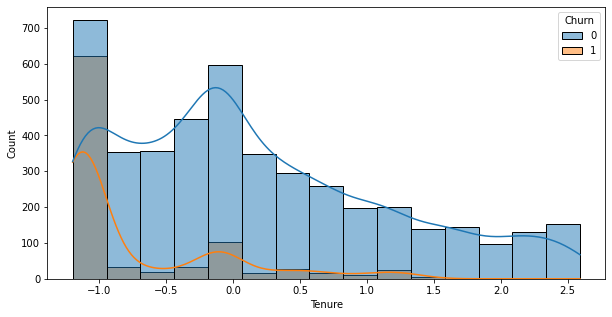

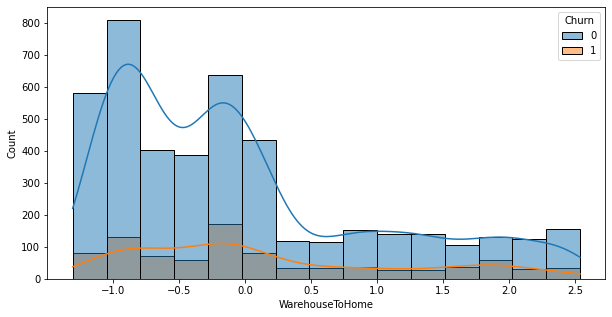

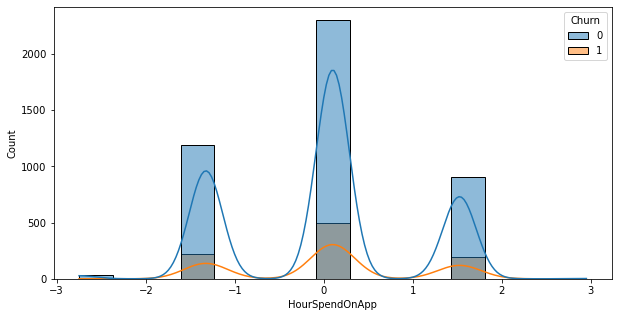

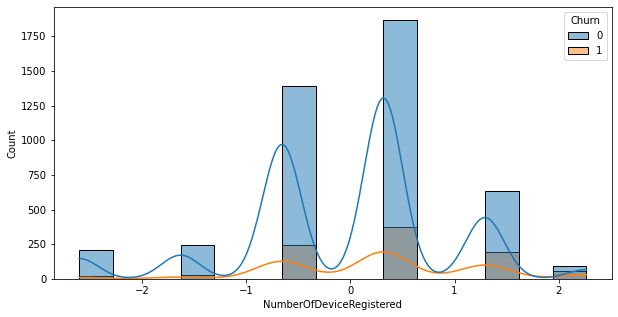

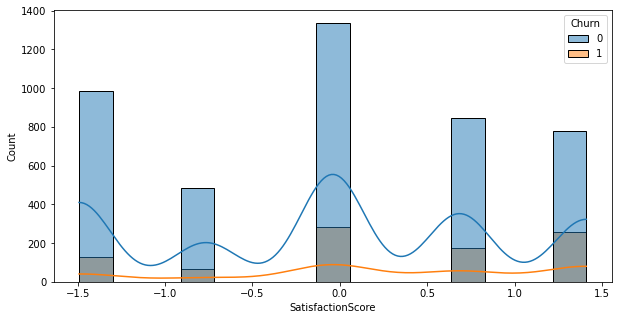

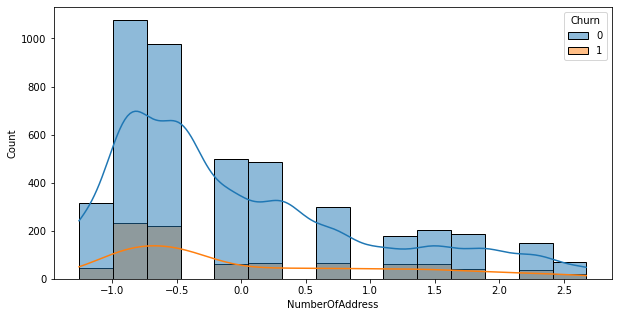

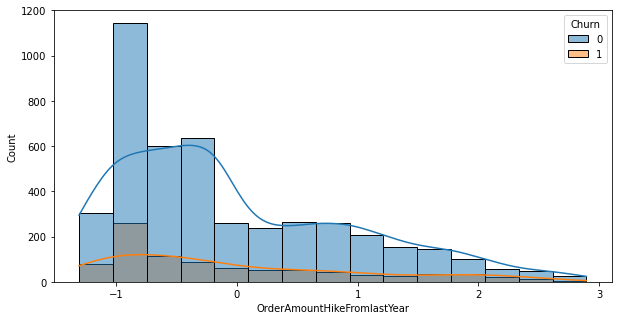

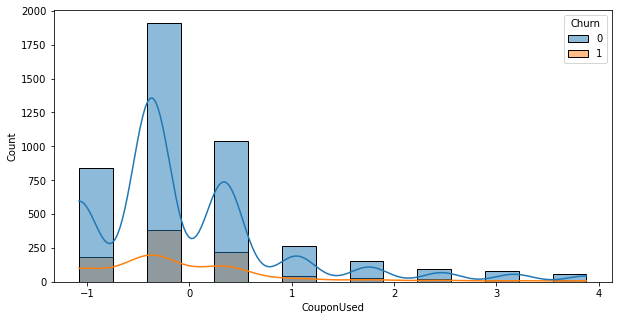

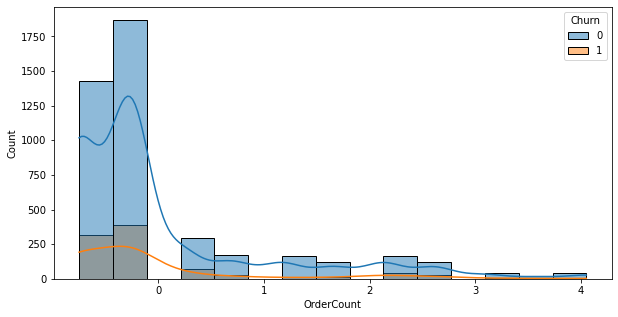

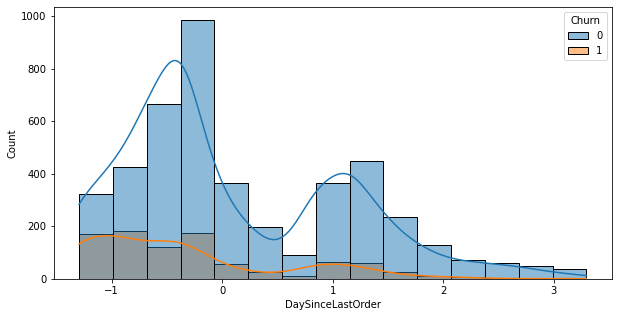

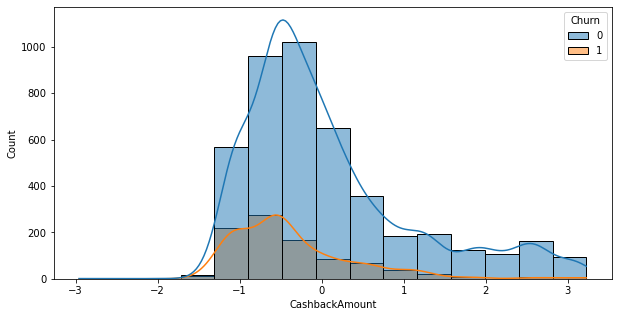

In [144]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df5_standardized, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

### Transformasi Data Skewed dengan Metode Log

In [277]:
df5_logged = df4_zscore.copy()

In [278]:
skewed = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [279]:
df5_logged['Tenure'] = np.log(df5_logged['Tenure'])
df5_logged['WarehouseToHome'] = np.log(df5_logged['WarehouseToHome'])
df5_logged['NumberOfAddress'] = np.log(df5_logged['NumberOfAddress'])
df5_logged['OrderAmountHikeFromlastYear'] = np.log(df5_logged['OrderAmountHikeFromlastYear'])
df5_logged['CouponUsed'] = np.log(df5_logged['CouponUsed'])
df5_logged['OrderCount'] = np.log(df5_logged['OrderCount'])
df5_logged['DaySinceLastOrder'] = np.log(df5_logged['DaySinceLastOrder'])
df5_logged['CashbackAmount'] = np.log(df5_logged['CashbackAmount'])

In [280]:
df5_logged.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3079,0,2.397895,Mobile Phone,1,2.833213,Debit Card,Male,3.0,4.0,Laptop & Accessory,4.0,Single,1.386294,1,2.564949,0.000000,0.693147,0.693147,5.117814
33,0,2.564949,Mobile Phone,3,2.302585,E wallet,Male,3.0,4.0,Fashion,2.0,Divorced,2.079442,0,2.397895,0.693147,0.693147,2.397895,5.340179
4380,0,2.302585,Mobile Phone,1,2.484907,Debit Card,Male,4.0,4.0,Laptop & Accessory,4.0,Single,2.302585,0,2.833213,1.098612,1.386294,2.079442,5.215696
1850,0,-inf,Mobile Phone,1,2.484907,Debit Card,Female,3.0,3.0,Mobile Phone,1.0,Married,0.693147,1,2.564949,-inf,0.000000,0.693147,4.025352
326,0,2.708050,Mobile Phone,1,3.401197,Credit Card,Male,2.0,3.0,Fashion,5.0,Divorced,0.693147,1,3.044522,1.386294,1.609438,2.079442,5.159400


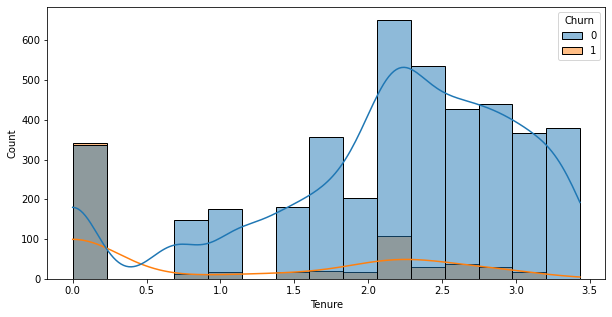

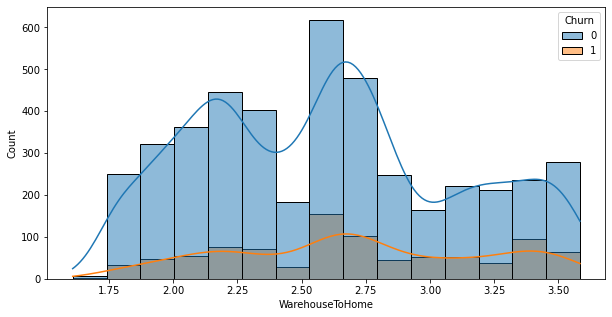

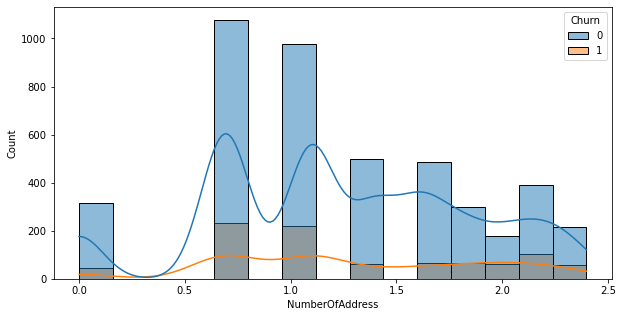

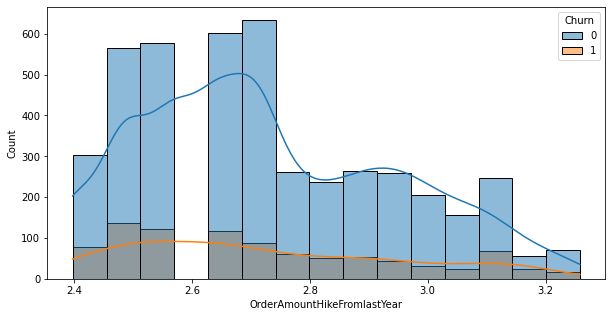

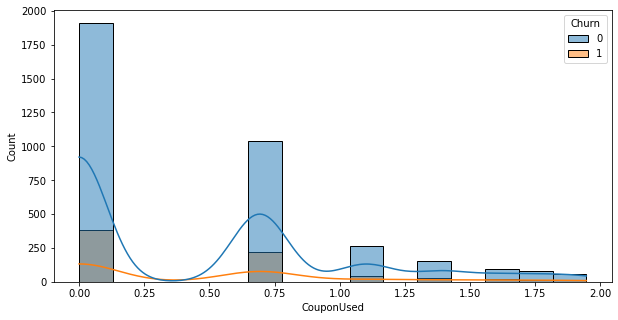

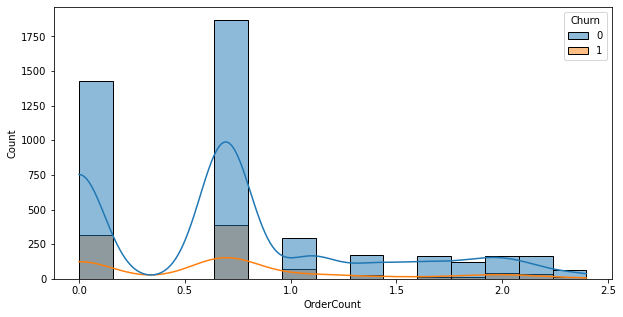

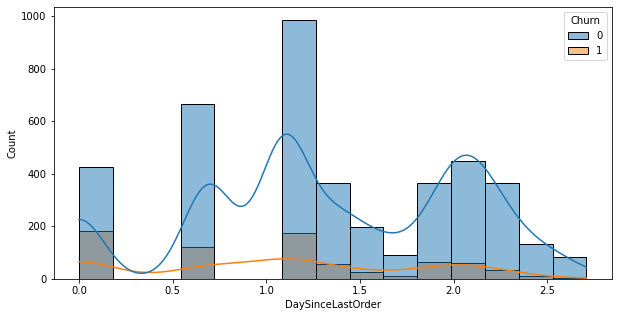

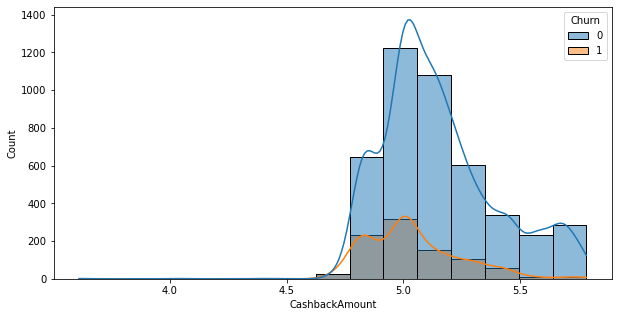

In [281]:
for i in skewed:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df5_logged, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

## D. Feature Encoding

In [343]:
df5 = df5_normalized.copy()

In [344]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df5[col].value_counts())
    print()

Value count kolom Churn:
0    4438
1     912
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3485
3    1627
2     238
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    3803
Computer        1547
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2195
Credit Card         1686
E wallet             579
Cash on Delivery     489
UPI                  401
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3214
Female    2136
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2053
Laptop & Accessory    2000
Fashion                752
Grocery                332
Others                 213
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2825
Single      1722
Divorced     803
Name: MaritalStatus, dtype: int64

Value count kolom Complain:
0    3818
1    1532
Name: Complain, dtype: int64



### Label Encoding

In [345]:
mapping_gender = {
    'Male'   : 0,
    'Female' : 1
}

mapping_PreferredLoginDevice = {
    'Mobile Phone' : 0,
    'Computer':1
}

df5['Gender'] = df5['Gender'].map(mapping_gender)
df5['PreferredLoginDevice'] = df5['PreferredLoginDevice'].map(mapping_PreferredLoginDevice)

### One Hot Encoding 

In [346]:
# One hot encoder 
# WARNING: run code ini sekali saja
for cat in ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']:
    onehots = pd.get_dummies(df5[cat], prefix=cat)
    df5 = df5.join(onehots)

In [347]:
df5.drop('PreferredPaymentMode', axis = 1, inplace = True)
df5.drop('PreferedOrderCat', axis = 1, inplace = True)
df5.drop('MaritalStatus', axis = 1, inplace = True)

In [349]:
# set the for show max columns
pd.set_option('display.max_columns', None)
df5.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3151,0,0.290323,0,3,0.064516,1,0.75,0.6,0.50,0.2,0,0.400000,0.142857,0.1,0.266667,0.474716,0,1,0,0,0,0,0,1,0,0,0,0,1
447,0,0.064516,0,1,0.903226,1,0.50,0.4,0.50,0.4,0,0.066667,0.142857,0.0,0.066667,0.369617,0,1,0,0,0,0,0,1,0,0,1,0,0
620,0,0.903226,1,1,0.612903,0,0.50,0.4,0.75,0.3,1,0.200000,0.857143,0.5,0.466667,0.440865,0,1,0,0,0,0,0,1,0,0,1,0,0
2683,1,0.000000,0,3,0.322581,0,0.25,0.4,0.00,0.1,0,0.133333,0.000000,0.0,0.000000,0.256525,0,1,0,0,0,0,0,0,1,0,0,0,1
721,0,0.258065,0,1,0.096774,0,0.25,0.6,0.75,0.2,0,0.466667,0.857143,0.5,0.266667,0.576026,0,0,1,0,0,1,0,0,0,0,0,1,0


## E. Imbalance Class

In [351]:
df6 = df5.copy()

In [352]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5350 non-null   int64  
 1   Tenure                                 5350 non-null   float64
 2   PreferredLoginDevice                   5350 non-null   int64  
 3   CityTier                               5350 non-null   int64  
 4   WarehouseToHome                        5350 non-null   float64
 5   Gender                                 5350 non-null   int64  
 6   HourSpendOnApp                         5350 non-null   float64
 7   NumberOfDeviceRegistered               5350 non-null   float64
 8   SatisfactionScore                      5350 non-null   float64
 9   NumberOfAddress                        5350 non-null   float64
 10  Complain                               5350 non-null   int64  
 11  Orde

In [353]:
X = df6.drop(columns=['Churn'])
y = df6['Churn']

In [354]:
from imblearn import over_sampling
x_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

C:\Users\abdus\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\abdus\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [355]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    4438
1     912
Name: Churn, dtype: int64


OVERSAMPLING
0    4438
1    2219
Name: Churn, dtype: int64


SMOTE
0    4438
1    2219
Name: Churn, dtype: int64
